In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
import glob as gb
from functools import reduce
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import numpy as np
plt.style.use('classic')

In [2]:
## Canvas parameters

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 9 and height to 6
fig_size[0] = 10.5
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size
# Allowing background color
plt.rc('nbagg', transparent=False)

<IPython.core.display.Javascript object>


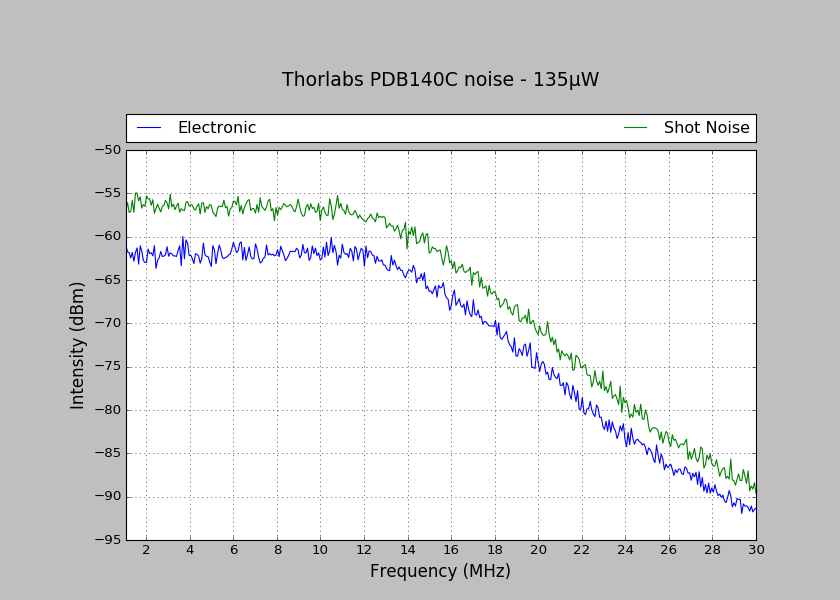

In [3]:
## Getting data from files of OS and ESA

cols = ['f','EN', 'ShotNoise', 'Trace3']

ESA = pd.read_csv("TLPDB.CSV", sep=',', skiprows=range(0, 16), 
                                   header=None,names=cols) # no cavity

noise_labels = {'EN': "Electronic", 'ShotNoise': "Shot Noise"}

f = plt.figure()
plt.subplots_adjust(top=0.75, hspace=0.6, left=0.15)

ax = plt.subplot(111)

ESA.f *= 1E-6 # freq to MHz
ESA.rename(columns=noise_labels, 
           copy=False).plot('f', y=['Electronic', 'Shot Noise'], 
                            kind='line', ax=ax)

ax.set_title('Thorlabs PDB140C noise - 135μW', y=1.15, size=17)
ax.set_xlabel('Frequency (MHz)', size=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_ylabel('Intensity (dBm)', size=15)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

ax.grid(True)


h1, l1 = ax.get_legend_handles_labels()
ax.legend(h1, l1, 
           bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, 
           mode="expand", borderaxespad=0.)

plt.savefig('noise_PDB140C.png', bbox_inches='tight', dpi=120)